# Project : Visualizing earnings based on college majors

In this project we'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/) and FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

* **Rank** - Rank by median earnings (the dataset is ordered by this column).
* **Major_code** - Major code.
* **Major** - Major description.
* **Major_category** - Category of major.
* **Total** - Total number of people with major.
* **Sample_size** - Sample size (unweighted) of full-time.
* **Men** - Male graduates.
* **Women** - Female graduates.
* **ShareWomen** - Women as share of total.
* **Employed** - Number employed.
* **Median** - Median salary of full-time, year-round workers.
* **Low_wage_jobs** - Number in low-wage service jobs.
* **Full_time** - Number employed 35 hours or more.
* **Part_time** - Number employed less than 35 hours.

We are going to answer to a variety of questions based on the data analysis :

- Do students in more popular majors make more money?
- How many majors are predominantly male or predominantly female?
- Which category of majors have the most students?

---
### Introducing to our dataset

- Importing pandas and matplotlib libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

- Reading recent-grads.csv file

In [2]:
recent_grads = pd.read_csv('recent-grads.csv')

In [3]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [4]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [7]:
raw_data_count = recent_grads.shape[0]
print(raw_data_count)

173


From the data above we can see that our Data set has **173 rows**, **21 columns**, and the dtypes are predominantly numeric(app.90%).

We can see that some of the columns have 1 missing values so our job would be to clean that row.

In [8]:
recent_grads = recent_grads.dropna() #using dropna method for deleting missing values
print(recent_grads.shape)

(172, 21)


In [9]:
cleaned_data_count = recent_grads.shape[0] #inspecting the rows in our data
print(cleaned_data_count)

172


###  ~ Exploring relations using Scatter plots betweeen different columns

**1) Sample_size vs Median** 

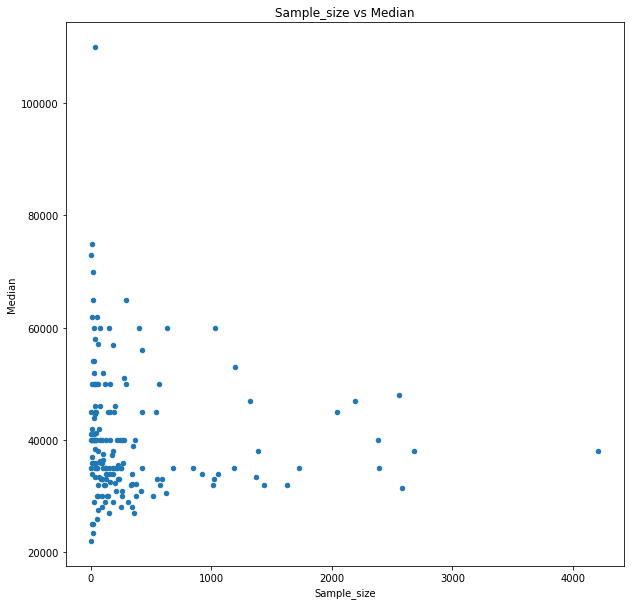

In [10]:
recent_grads.plot('Sample_size','Median', 'scatter', title="Sample_size vs Median", figsize =(10,10))

**2) Sample_size vs Unemployment_rate**

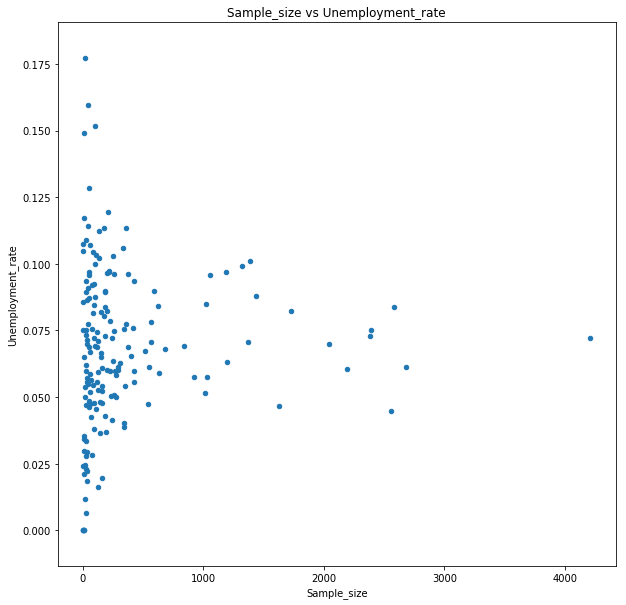

In [11]:
recent_grads.plot('Sample_size','Unemployment_rate', 'scatter', title="Sample_size vs Unemployment_rate", figsize =(10,10))

**3) Full_time vs Median**

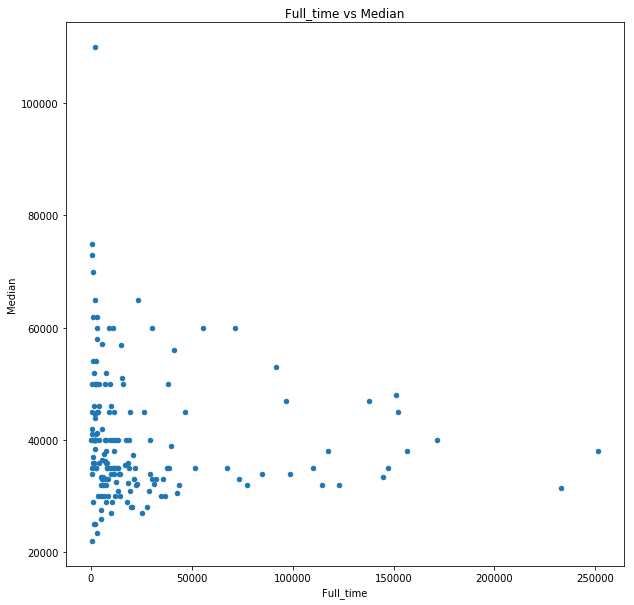

In [12]:
recent_grads.plot('Full_time','Median', 'scatter', title="Full_time vs Median", figsize =(10,10))

**4) ShareWomen vs Unemployment_rate**

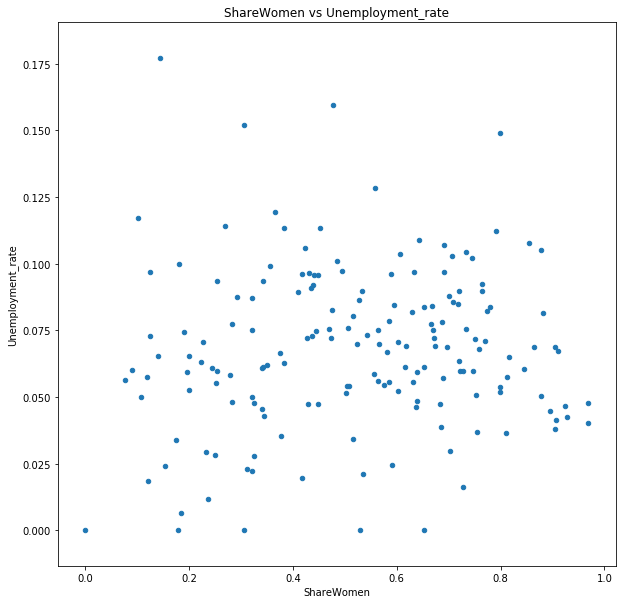

In [13]:
recent_grads.plot('ShareWomen','Unemployment_rate', 'scatter', title="ShareWomen vs Unemployment_rate", figsize =(10,10))

**5) Men vs Median**

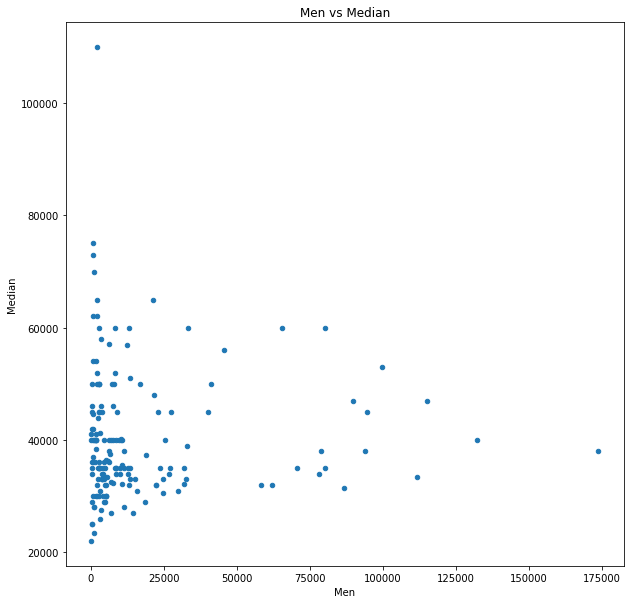

In [14]:
recent_grads.plot('Men','Median', 'scatter', title="Men vs Median", figsize =(10,10))

**6) Women vs Median**

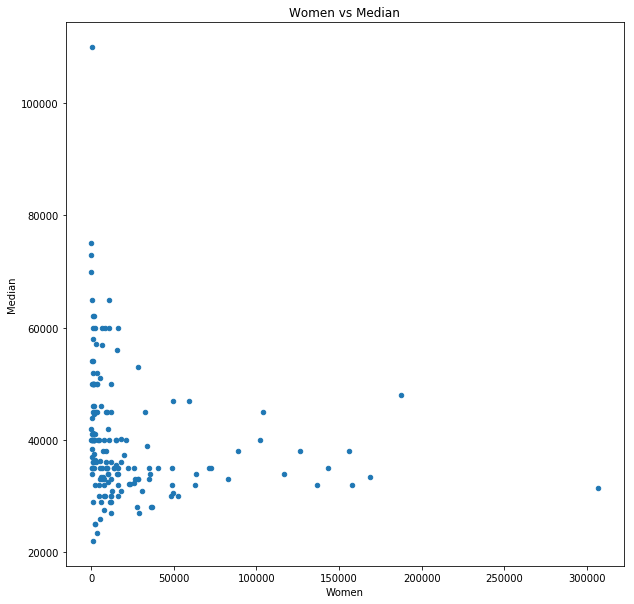

In [15]:
recent_grads.plot('Women','Median', 'scatter', title="Women vs Median", figsize =(10,10))

---

### ~ Exploring distribution using Histogram plots in different columns

In every histogram plot we are going to use different bin size so we can get better data visualisation.


** 1) Distribution of column Sample_size**

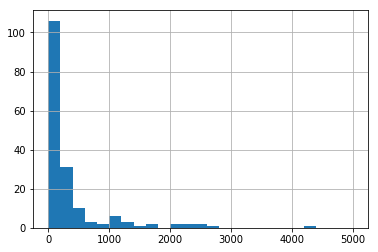

In [16]:
recent_grads['Sample_size'].hist(bins=25, range=(0,5000))

** 2) Distribution of column Median**

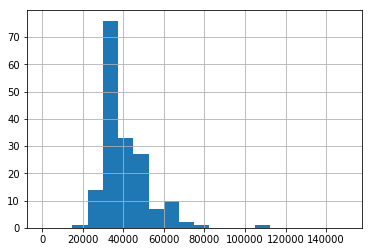

In [17]:
recent_grads['Median'].hist(bins=20, range=(0,150000))

** 3) Distribution of column Employed**

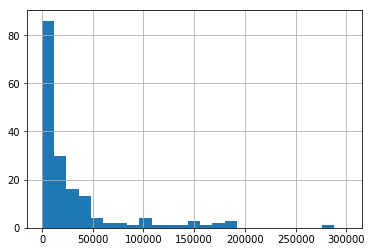

In [18]:
recent_grads['Employed'].hist(bins=25, range=(0,300000))

** 4) Distribution of column Full_time**

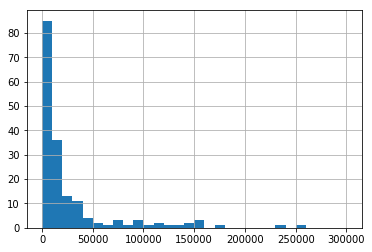

In [19]:
recent_grads['Full_time'].hist(bins=30, range=(0,300000))

** 5) Distribution of column Share_women**

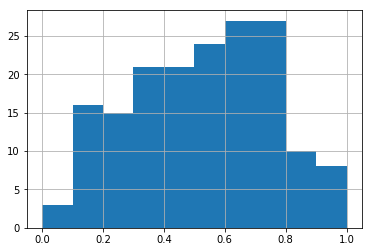

In [20]:
recent_grads['ShareWomen'].hist(bins=10, range=(0,1))

** 6) Distribution of column Unemployment_rate**

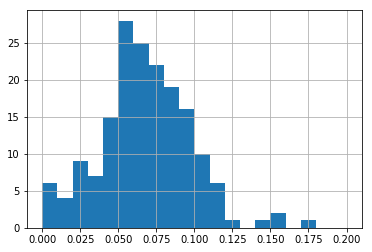

In [21]:
recent_grads['Unemployment_rate'].hist(bins=20, range=(0,0.2))

** 7) Distribution of column Men**

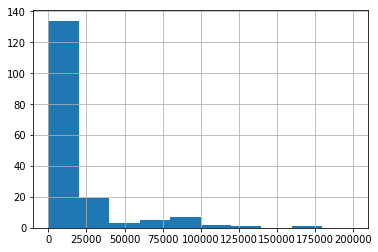

In [22]:
recent_grads['Men'].hist(bins=10, range=(0,200000))

** 8) Distribution of column Women**

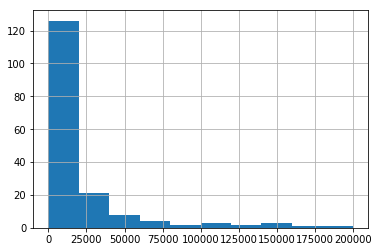

In [23]:
recent_grads['Women'].hist(bins=10, range=(0,200000))

In [24]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


### Observations:

- It is good to add the statistics about the dataset we analyse so we can see the broader picture.
- Analysing Median histogram we can see that the average salary for every row is between 20,000 and 50,000 and that over 70 columns have value around ~20-25,000.
- Median salary from the descriptive statistics is 36,000.
- The share women is 53%.
- The average unemployment rate of students from all majors is 6,75%

### ~ Importing Scatter matrix function

- Importing scatter matrix function from pandas.plotting module

In [25]:
from pandas.plotting import scatter_matrix

**1) Scatter matrix plot using Sample_size and Median columns**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000209BBAFA0B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000209BBC97358>]], dtype=object)

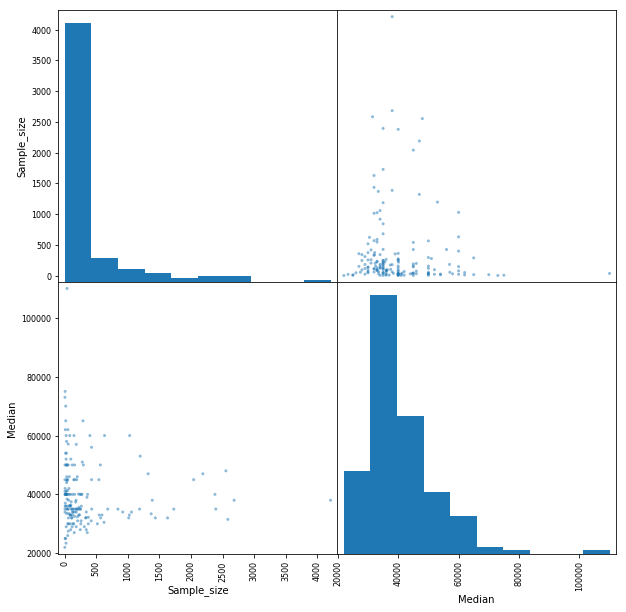

In [26]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

**2) Scatter matrix plot using Sample_size, Median and Unemployment_rate columns**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000209BBDE0B70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000209BC2AFEB8>]], dtype=object)

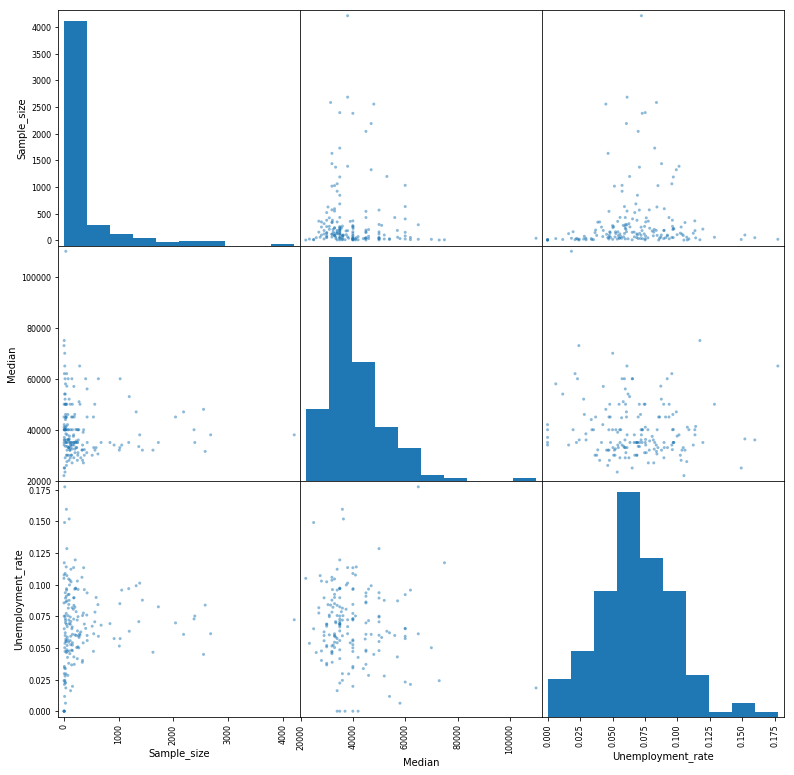

In [27]:
scatter_matrix(recent_grads[['Sample_size', 'Median','Unemployment_rate']], figsize=(13,13))

### ~ Using Bar plot for data analysis

** 1) Bar plot using Major & ShareWomen colums for first 10 rows**

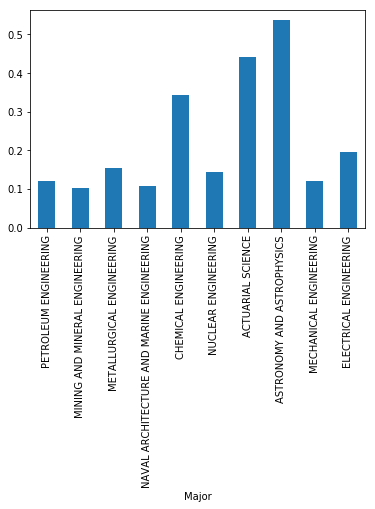

In [28]:
recent_grads[:10].plot.bar(x="Major", y ='ShareWomen', legend=False)

** 2) Bar plot using Major & ShareWomen colums for last 10 rows **

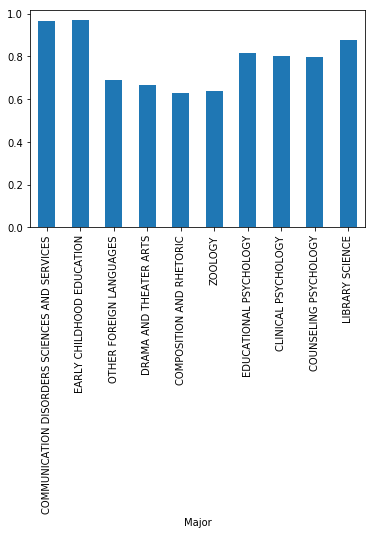

In [29]:
recent_grads[-10:].plot.bar(x="Major", y ='ShareWomen', legend = False)

Observations :

- We can see from the bar plot above that women are majority in the majors that have lowest median salary.
- If we analyse the top 10 majors we can see that women have participation that in the last 10 majors.


** 3) Bar plot using Major & Unemployment_rate colums for first 10 rows **

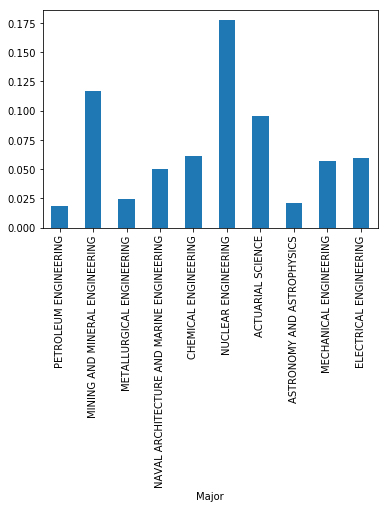

In [30]:
recent_grads[:10].plot.bar(x="Major", y ='Unemployment_rate', legend=False)


** 4) Bar plot using Major & Unemployment_rate colums for last 10 rows **

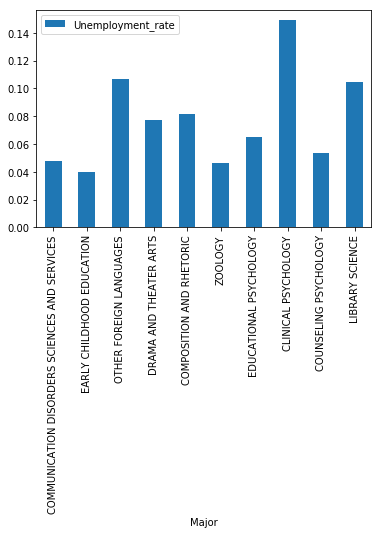

In [31]:
recent_grads[-10:].plot.bar(x="Major", y ='Unemployment_rate')

### Observation:

- Analysing only the top 10 and last 10 majors we can see that Nuclear Engeneering and Clinical Psychology have the biggest unemployment rates.

## Additional analysis

** 1) Bar plot using Major, Men and Women columns for first 10 rows**

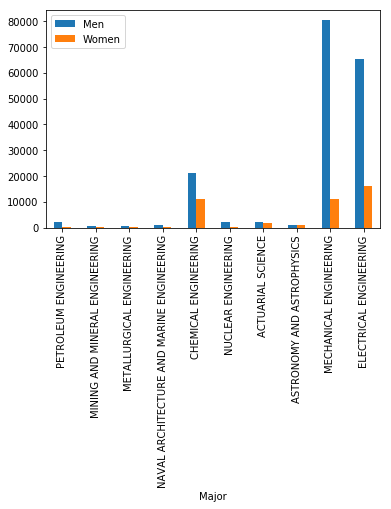

In [32]:
recent_grads[:10].plot.bar(x="Major", y =['Men','Women'])

** 2) Bar plot using Major, Men and Women columns for first 10 rows**

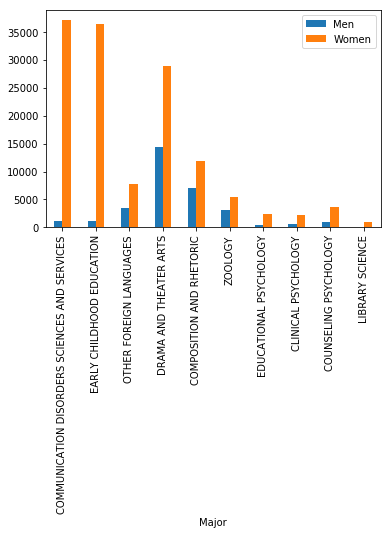

In [33]:
recent_grads[-10:].plot.bar(x="Major", y =['Men','Women'])

** 3) Bar plot using Major and Median columns for all dataset**

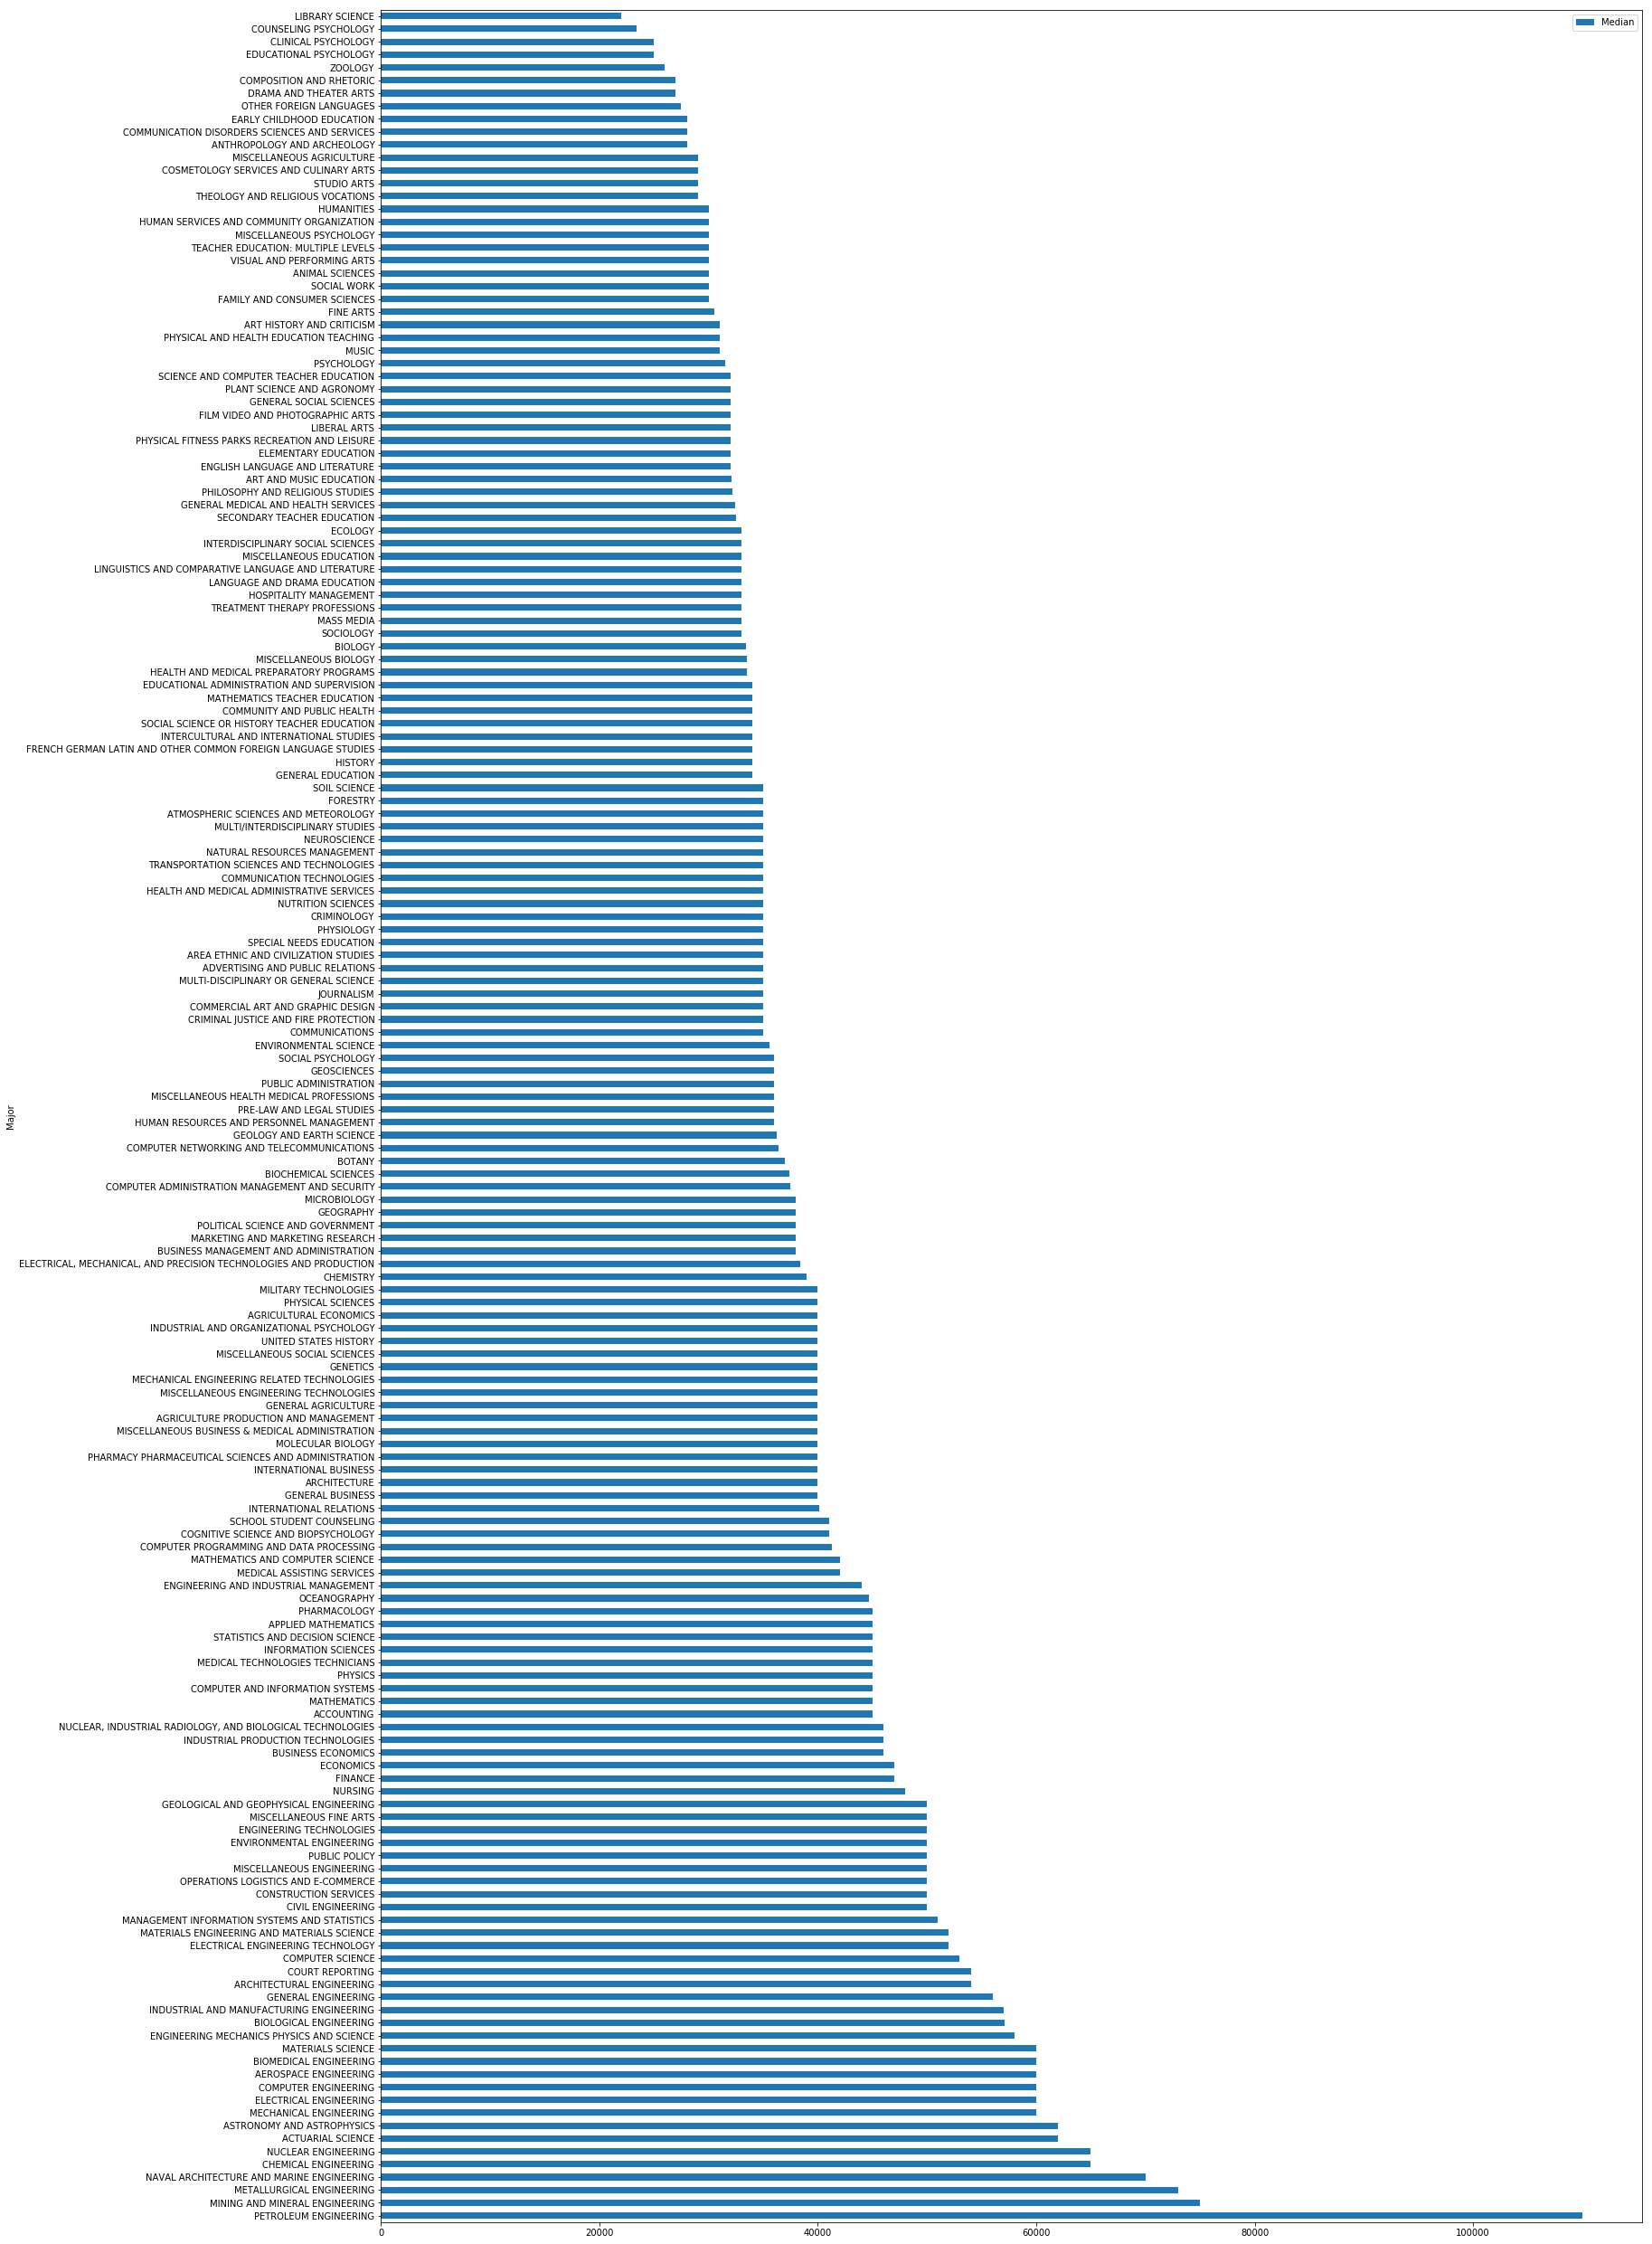

In [34]:
ax1 = recent_grads.plot(kind='barh',x="Major", y ='Median',figsize=(25,45))

The above bar plot shows the median salary for all majors in the dataset. 

The biggest median salary has Petroleum engineering, and the lowest median salary has the major library science.

**4) Box plot using Median and Unemployment_rate columns**

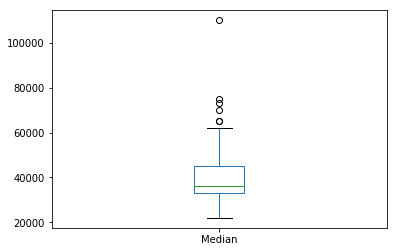

In [35]:
recent_grads['Median'].plot.box()

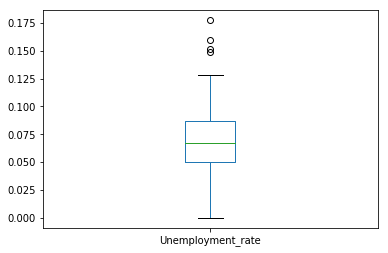

In [36]:
recent_grads['Unemployment_rate'].plot.box()

Observations:
- Median salaries are from 20,000 and 50,000 and with some extreme values with the biggest of over 110,000.
- If we analyse the unemployment rate, again we can see that it spreads from 0 % until 13% (extreme rates:biggest arround 17,5%)
    


Use a box plot to explore the distributions of median salaries and unemployment rate.


** 5) Hexagonal box plots**

We can use also hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project like:
- Sample_size and Median
- Sample_size and Unemployment_rate
- Median and Unemployment_rate

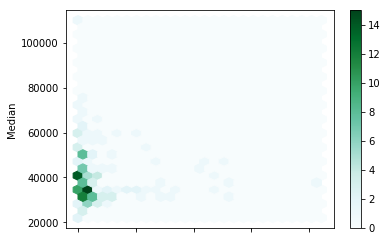

In [37]:
recent_grads.plot.hexbin(x = "Sample_size", y = 'Median', gridsize =25)

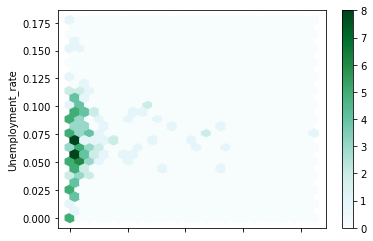

In [38]:
recent_grads.plot.hexbin(x = "Sample_size", y = 'Unemployment_rate', gridsize =25)

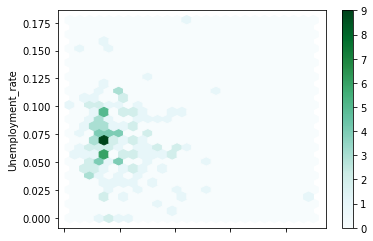

In [39]:
recent_grads.plot.hexbin(x = 'Median',y ="Unemployment_rate", gridsize =25)